## Polynomial Regression        

In [1]:
##Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

#### Introduction to the Dataset

Our dataset is about a company's Salary policy. In contains Position Name, Position Level and these salaries. As a machine learning study, we are using this dataset to predict salary amount according to the level stage. In business case, this model can be use -in basic stage- salary amount confirmatory model to comparing new personel hiring process.For example, A candidate say that he has Level 6.5 on his previous company and he earned nearly 185000USD/year. In this instance, model can be use for predicting the salary amount with respect to his level stage. Thus, employers can measure the consistency of candidate words.     

In [2]:
## Importing the dataset
dataset = pd.read_csv("Data.csv")
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
##Splitting the dataset into Feature/s and Label 
X = dataset.iloc[:, 1:2].values        
        #We select independent variable that is Level column.
        #sklearn models works with matrix of feature/s. So, if
        #there is only one feature group, we should convert it like a matrix
print(X)
                          
y = dataset.iloc[:,2].values           
        #We just type :,2 for selecting the last column which is our
        #Label or target: Salary. Label column can be vector. Sklearn
        #can work with its structure.
        #Also, it can be select with :-1. This takes only last column.
                
print(y)

## Splitting the dataset into training set and a test set

        #Our dataset is very limited. Also we desire to develop 
        #a very accurate salary predicition model. So we do not
        #need to split dataset to the test set and the training set. 
        
## Feature Scaling          
        
        #We are not implement the Feature Scaling step. Because,
        #After some preprocessing steps, linear regression
        #model will be use to predict new label values.
        #So, model cares the scaling process itself

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


#### Comparing 2 Models - Simple Linear Regression and Polynomial Regression

Here, we are going to create to machine leaning models with Simple Linear Regression and Polynomial Regression. As we know SLR has below equation; 

    y = b0 + b1.x1

It has b0 and b1 coefficients and x1 and x0 variables.(x0 = 0, so it is not seen) 
In polynomial regression;

    y = b0 + b1.x1^(1) + b2.x1^(2) + b3.x1^(3) + b4.x1^(4) + ... +  bn.x1^(n)
    
So, it can be say that it is like linear regression but its x1 variable can be expand and represent with high degrees. So, when the linear regression is represented with a smooth line, polynomial regression can be displayed with curved line. It can be convex or concave.  



In [4]:
# Fitting the Linear Regression to the dataset

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
# Transforming the X to the Polynomial Features

from sklearn.preprocessing import PolynomialFeatures
def poly_model(degree):
    poly_reg = PolynomialFeatures(degree = degree)  
    X_poly = poly_reg.fit_transform(X)
    #print(X_poly)
    
    # Fitting the Polynomial Regression to the dataset
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly,y)
    return X_poly, poly_reg, lin_reg_2

poly_model(degree = 2)

(array([[  1.,   1.,   1.],
        [  1.,   2.,   4.],
        [  1.,   3.,   9.],
        [  1.,   4.,  16.],
        [  1.,   5.,  25.],
        [  1.,   6.,  36.],
        [  1.,   7.,  49.],
        [  1.,   8.,  64.],
        [  1.,   9.,  81.],
        [  1.,  10., 100.]]),
 PolynomialFeatures(degree=2, include_bias=True, interaction_only=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))

#### Implementing the Polynomial regression model to the dataset

Firstly, we imported package and created an object with degree = 2. poly_reg object helps matrix of features of X to fit and transform to 2 degrees. It creates an equation like;

    y = b0 + b1.x1^(1) + b2.x1^(2)
    
All 1s are represent x0 variables, second column shows x1 and last column displays x1^(2) variable. It is the 2nd degree of x1^(1) variables.
    
After the fit and tranformation of the X set, we implement the LinearRegression() model and fit it with X_poly and y.

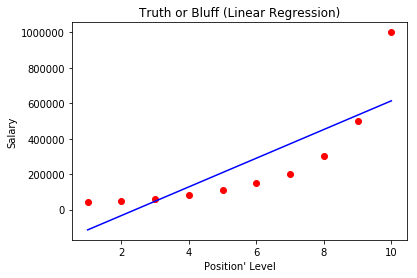

In [6]:
#Visualizing the Linear Regression Results

plt.scatter(X, y, color ="red")
plt.plot(X, lin_reg.predict(X), color = "blue")
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position' Level")
plt.ylabel("Salary")
plt.show()

- On the above, we plotted the line according to the linear regression model.As you see, the line is not a very smooth with real salary points. We can just say that Level 3 and Level 9 are close to the prediction line but another real Level dots are different from the predicted salary results.   

Polynomial Degree :  2 



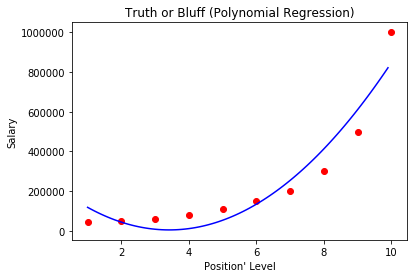

Polynomial Degree :  3 



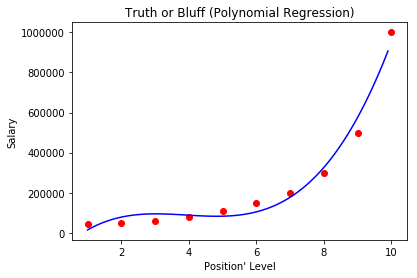

Polynomial Degree :  4 



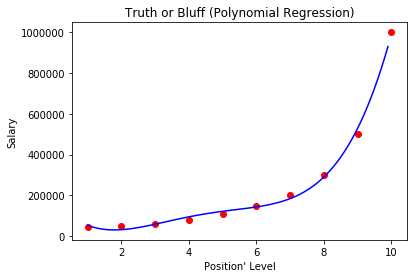

In [7]:
#Visualizing the Polynomial Regression Results

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

for degree in range(2,5):                       #"for loop" for the plotting with different degrees 
    print("Polynomial Degree : " , degree, "\n")
    X_poly, poly_reg, lin_reg_2 = poly_model(degree)    #call the model for plotting process 
    plt.scatter(X, y, color ="red")
    plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = "blue")
    plt.title("Truth or Bluff (Polynomial Regression)")
    plt.xlabel("Position' Level")
    plt.ylabel("Salary")
    plt.show()

#### Visualizations of Various Level of Degrees of Polynomial Regression 

As you see on the above, we plotted 2nd, 3th and 4th degrees of the Polynomial Regression models to understand some differences from each other. According to the graphs, we can say that if the degree of the model increase, the line becomes more curved and passes very close to the Level points. Actually, it causes the overfitting problem and this is not a good thing but our target is a creating more accurate prediction model with limited dataset. So, we will ignore this situation.

On the 2nd degree polynomial regression graph, the line curves as a polynomial. On the 3rd, line becomes a concave and the 4th degree line nearly occurs with more accurate with real Salary Levels.    

In [8]:
# Predicting a new result with linear Regression
lin_reg.predict(6.5)

array([330378.78787879])

In [9]:
# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform(6.5))

array([158862.4526516])

#### Comparing the models with respect to predicted result 

According to the Level and Salary distributions Level: 6.5 is existed between 150.000USD and 200.000USD Salary ranges. So, we hope that our best model can give us a predicted value in this range. Polynomial regression model give more accurate results with respect to our target. Linear Regressor predicts 330.378USD, but 2nd degree Linear regressor predicts 158.862USD.

In [10]:
#Determining the Fitting Scores for Regression models

X_poly ,poly_reg , lin_reg_2 = poly_model(2)

print("Polynomial Regressor Score : ", lin_reg_2.score(X_poly, y))

print("Linear Regressor Score : ", lin_reg.score(X, y))

Polynomial Regressor Score :  0.9162082221443942
Linear Regressor Score :  0.6690412331929895
